# Worksheet 17

Name:  Jiahang Li
UID: U00295866

### Topics

- Gradient Descent

## Gradient Descent

Recall in Linear Regression we are trying to find the line $$y = X \beta$$ that minimizes the sum of square distances between the predicted `y` and the `y` we observed in our dataset:

$$\mathcal{L}(\mathbf{\beta}) = \Vert \mathbf{y} - X\mathbf{\beta} \Vert^2$$

We were able to find a global minimum to this loss function but we will try to apply gradient descent to find that same solution.

a) Implement the `loss` function to complete the code and plot the loss as a function of beta.

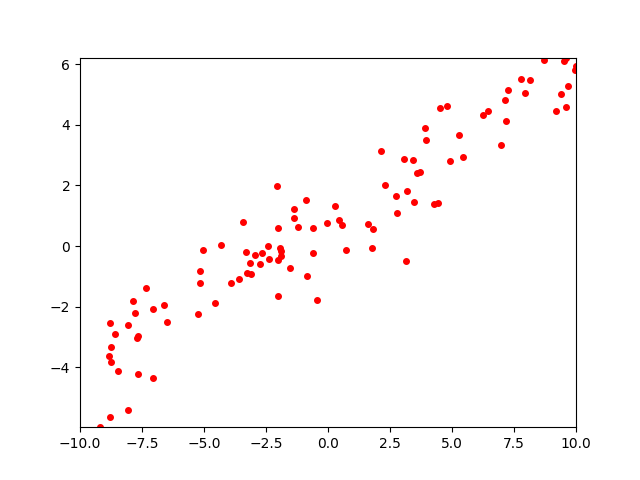

In [17]:
%matplotlib widget
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

beta = np.array([ 1 , .5 ])
xlin = -10.0 + 20.0 * np.random.random(100)
X = np.column_stack([np.ones((len(xlin), 1)), xlin])
y = beta[0]+(beta[1]*xlin)+np.random.randn(100)

fig, ax = plt.subplots()
ax.plot(xlin, y,'ro',markersize=4)
ax.set_xlim(-10, 10)
ax.set_ylim(min(y), max(y))
plt.show()

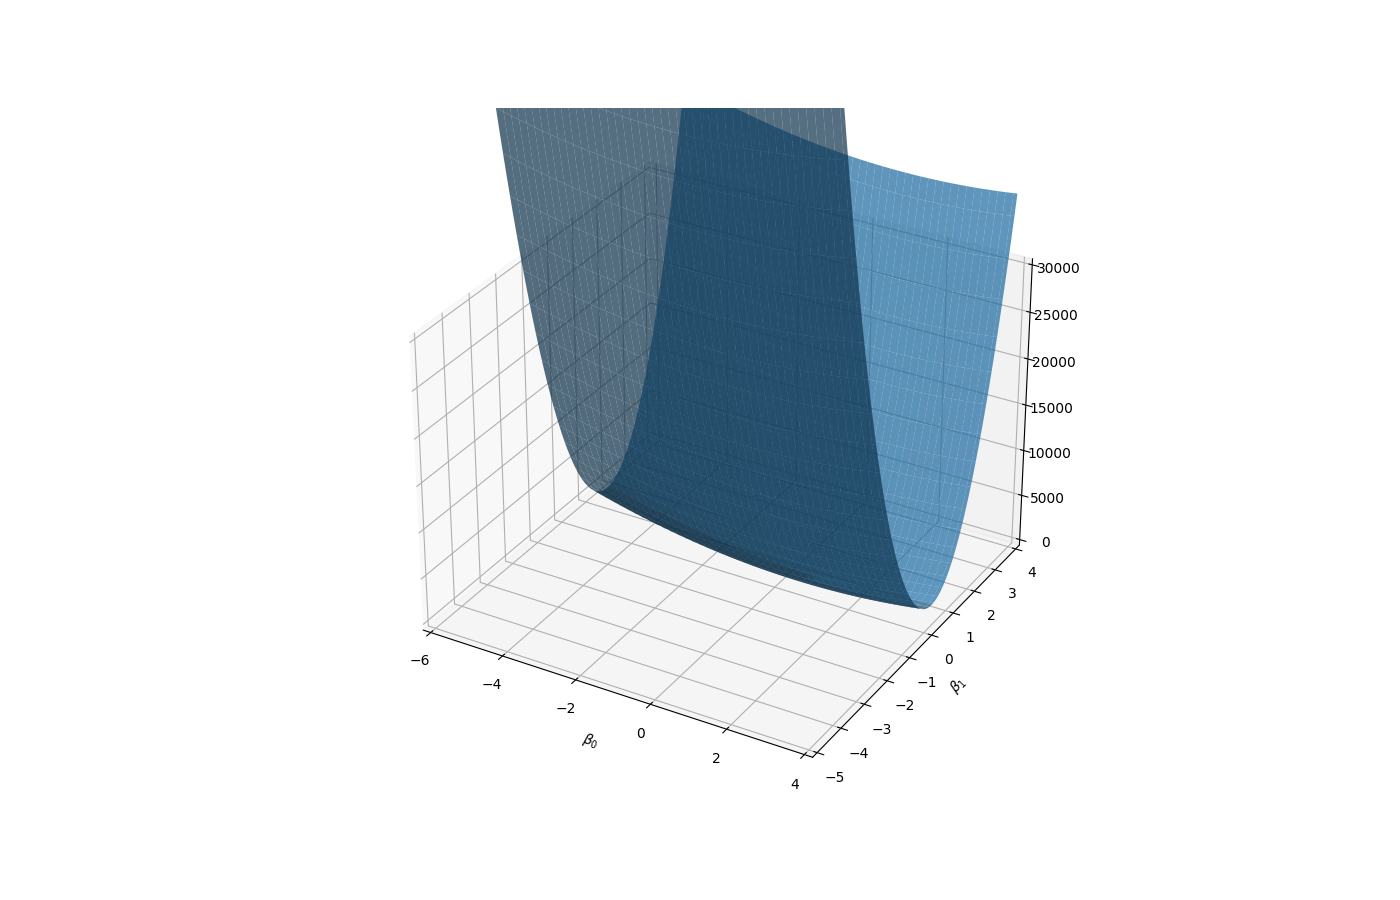

In [18]:
b0 = np.arange(-5, 4, 0.1)
b1 = np.arange(-5, 4, 0.1)
b0, b1 = np.meshgrid(b0, b1)

def loss(X, y, beta):
    diff = y - X @ beta
    return np.sum(diff**2)


def get_cost(B0, B1):
    res = []
    for b0, b1 in zip(B0, B1):
        line = []
        for i in range(len(b0)):
            beta = np.array([b0[i], b1[i]])
            line.append(loss(X, y, beta))
        res.append(line)
    return np.array(res)

cost = get_cost(b0, b1)
 
# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax.set_xlim(-6, 4)
ax.set_xlabel(r'$\beta_0$')
ax.set_ylabel(r'$\beta_1$')
ax.set_ylim(-5, 4)
ax.set_zlim(0, 30000)

# Creating plot
ax.plot_surface(b0, b1, cost, alpha=.7)
 
# show plot
plt.show()

Since the loss is

$$\mathcal{L}(\mathbf{\beta}) = \Vert \mathbf{y} - X\mathbf{\beta} \Vert^2 = \beta^T X^T X \beta - 2\mathbf{\beta}^TX^T\mathbf{y}  + \mathbf{y}^T\mathbf{y}$$

The gradient is

$$\nabla_\beta \mathcal{L}(\mathbf{\beta}) = 2X^T X \beta - 2X^T\mathbf{y}$$

b) Implement the gradient function below and complete the gradient descent algorithm

In [19]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt

TEMPFILE = "temp.png"

def snap(betas, losses):
    # Creating figure
    fig = plt.figure(figsize =(14, 9))
    ax = plt.axes(projection ='3d')
    ax.view_init(20, -20)
    ax.set_xlim(-5, 4)
    ax.set_xlabel(r'$\beta_0$')
    ax.set_ylabel(r'$\beta_1$')
    ax.set_ylim(-5, 4)
    ax.set_zlim(0, 30000)

    # Creating plot
    ax.plot_surface(b0, b1, cost, color='b', alpha=.7)
    ax.plot(np.array(betas)[:,0], np.array(betas)[:,1], losses, 'o-', c='r', markersize=10, zorder=10)
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))


def gradient(X, y, beta):
    return 2 * (X.T @ X @ beta - X.T @ y)

def gradient_descent(X, y, beta_hat, learning_rate, epochs, images):
    losses = [loss(X, y, beta_hat)]
    betas = [beta_hat]

    for _ in range(epochs):
        images.append(snap(betas, losses))
        grad = gradient(X, y, beta_hat)
        beta_hat = beta_hat - learning_rate * grad

        losses.append(loss(X, y, beta_hat))
        betas.append(beta_hat)
        
    return np.array(betas), np.array(losses)


beta_start = np.array([-5, -2])
learning_rate = 0.0002 # try .0005
images = []
betas, losses = gradient_descent(X, y, beta_start, learning_rate, 10, images)

images[0].save(
    'gd.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=500
)

c) Use the code above to create an animation of the linear model learned at every epoch.

In [20]:
def snap_model(beta):
    xplot = np.linspace(-10, 10, 50)
    yestplot = beta[0] + beta[1] * xplot
    fig, ax = plt.subplots()
    ax.plot(xplot, yestplot, 'b-', lw=2)
    ax.plot(xlin, y, 'ro', markersize=4)
    ax.set_xlim(-10, 10)
    ax.set_ylim(min(y), max(y))
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))


def gradient_descent(X, y, beta_hat, learning_rate, epochs, images):
    losses = [loss(X, y, beta_hat)]
    betas = [beta_hat]

    for _ in range(epochs):
        images.append(snap_model(beta_hat))
        beta_hat = beta_hat - learning_rate * gradient(X, y, beta_hat)

        losses.append(loss(X, y, beta_hat))
        betas.append(beta_hat)
        
    return np.array(betas), np.array(losses)


images = []
betas, losses = gradient_descent(X, y, beta_start, learning_rate, 100, images)

images[0].save(
    'model.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=200
)

In logistic regression, the `loss` is the negative log-likelihood

$$ \mathcal{l}(\mathbf{\beta}) = - \frac{1}{N} \sum_{i=1}^{N} y_i \log(\sigma(x_i \beta)) + (1 - y_i)\log(1 - \sigma(x_i \beta))$$

the gradient of which is:

$$\nabla_\beta \mathcal{l}(\mathbf{\beta}) = \frac{1}{N} \sum_{i=1}^{N} x_i (y_i - \sigma(x_i \beta)) $$

d) Plot the loss as a function of b.

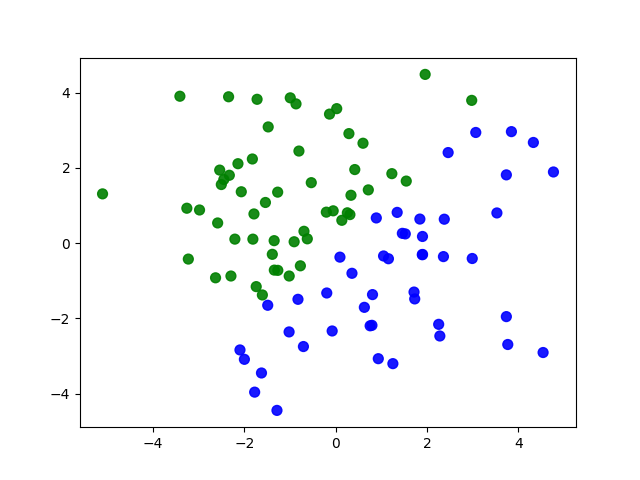

In [21]:
%matplotlib widget
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

centers = [[0, 0]]
t, _ = datasets.make_blobs(n_samples=100, centers=centers, cluster_std=2, random_state=0)

# LINE
def generate_line_data():
    # create some space between the classes
    X = t
    Y = np.array([1 if x[0] - x[1] >= 0 else 0 for x in X])
    return X, Y

X, y = generate_line_data()

cs = np.array([x for x in 'gb'])
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], color=cs[y].tolist(), s=50, alpha=0.9)
plt.show()

/Users/lijiahang/opt/anaconda3/envs/qagnn/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/Users/lijiahang/opt/anaconda3/envs/qagnn/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]
/Users/lijiahang/opt/anaconda3/envs/qagnn/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: Z contains NaN values. This may result in rendering artifacts.
/Users/lijiahang/opt/anaconda3/envs/qagnn/lib/python3.7/site-packages/mpl_toolkits/mplot3d/axes3d.py:1814: RuntimeWarning: invalid value encountered in subtract
  v2[poly_i, :] = ps[i2, :] - ps[i3, :]
/Users/lijiahang/opt/anaconda3/envs/qagnn/lib/python3.7/site-packages/mpl_toolkits/mplot3d/axes3d.py:1813: RuntimeWarning: invalid value encountered in subtract
  v1[poly_i, :] = ps[i1, :] - ps[i2, :]
/Users/lijiahang/opt/anaconda3/envs/qagnn/lib/python3.7/site-packages/numpy/core/numeric.py:16

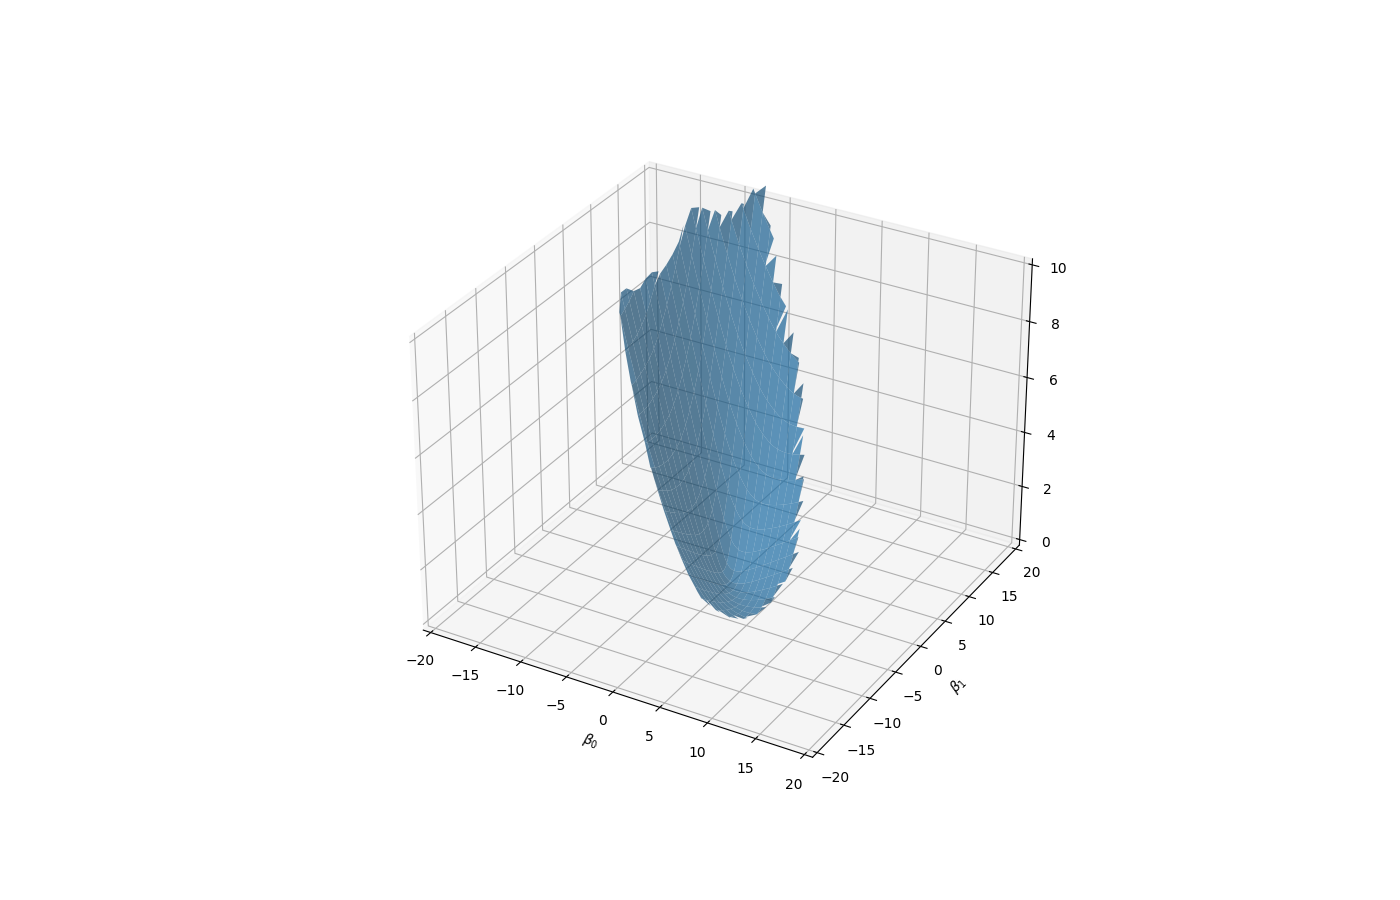

In [22]:
b0 = np.arange(-20, 20, 0.1)
b1 = np.arange(-20, 20, 0.1)
b0, b1 = np.meshgrid(b0, b1)


def sigmoid(x):
    e = np.exp(x)
    return e / (1 + e)

def loss(X, y, beta):
    N = X.shape[0]
    y_pred = sigmoid(X @ beta)
    return - (1 / N) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))


def get_cost(B0, B1):
    res = []
    for b0, b1 in zip(B0, B1):
        line = []
        for i in range(len(b0)):
            beta = np.array([b0[i], b1[i]])
            line.append(loss(X, y, beta))
        res.append(line)
    return np.array(res)

cost = get_cost(b0, b1)

# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax.set_xlim(-20, 20)
ax.set_xlabel(r'$\beta_0$')
ax.set_ylabel(r'$\beta_1$')
ax.set_ylim(-20, 20)
ax.set_zlim(0, 10)

# Creating plot
ax.plot_surface(b0, b1, cost, alpha=.7)
 
# show plot
plt.show()

e) Plot the loss at each iteration of the gradient descent algorithm.

In [23]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt

TEMPFILE = "temp.png"

def snap(betas, losses):
    # Creating figure
    fig = plt.figure(figsize =(14, 9))
    ax = plt.axes(projection ='3d')
    ax.view_init(10, 10)
    ax.set_xlabel(r'$\beta_0$')
    ax.set_ylabel(r'$\beta_1$')
    ax.set_ylim(-20, 20)
    ax.set_zlim(0, 10)

    # Creating plot
    ax.plot_surface(b0, b1, cost, color='b', alpha=.7)
    ax.plot(np.array(betas)[:,0], np.array(betas)[:,1], losses, 'o-', c='r', markersize=10, zorder=10)
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))


def gradient(X, y, beta):
    N = X.shape[0]
    y_pred = sigmoid(X @ beta)
    return (1 / N) * (X.T @ (y - y_pred))



def gradient_descent(X, y, beta_hat, learning_rate, epochs, images):
    losses = [loss(X, y, beta_hat)]
    betas = [beta_hat]

    for _ in range(epochs):
        images.append(snap(betas, losses))
        beta_hat = beta_hat - learning_rate * gradient(X, y, beta_hat)

        losses.append(loss(X, y, beta_hat))
        betas.append(beta_hat)
        
    return np.array(betas), np.array(losses)


beta_start = np.array([-5, -2])
learning_rate = 0.1
images = []
betas, losses = gradient_descent(X, y, beta_start, learning_rate, 10, images)

images[0].save(
    'gd_logit.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=500
)

/Users/lijiahang/opt/anaconda3/envs/qagnn/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Z contains NaN values. This may result in rendering artifacts.
/Users/lijiahang/opt/anaconda3/envs/qagnn/lib/python3.7/site-packages/mpl_toolkits/mplot3d/proj3d.py:109: RuntimeWarning: invalid value encountered in true_divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w
/Users/lijiahang/opt/anaconda3/envs/qagnn/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Z contains NaN values. This may result in rendering artifacts.
/Users/lijiahang/opt/anaconda3/envs/qagnn/lib/python3.7/site-packages/mpl_toolkits/mplot3d/axes3d.py:1814: RuntimeWarning: invalid value encountered in subtract
  v2[poly_i, :] = ps[i2, :] - ps[i3, :]
/Users/lijiahang/opt/anaconda3/envs/qagnn/lib/python3.7/site-packages/mpl_toolkits/mplot3d/axes3d.py:1813: RuntimeWarning: invalid value encountered in subtract
  v1[poly_i, :] = ps[i1, :] - ps[i2, :]
/Users/lijiahang/opt/anaconda3/envs/qagnn

f) Create an animation of the logistic regression fit at every epoch.

In [24]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def snap_model(beta):
    xplot = np.linspace(-10, 10, 50)
    yestplot = sigmoid(beta[0] + beta[1] * xplot)
    fig, ax = plt.subplots()
    ax.plot(xplot, yestplot, 'b-', lw=2)
    ax.plot(xlin, y, 'ro', markersize=4)
    ax.set_xlim(-10, 10)
    ax.set_ylim(min(y), max(y))
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))


def gradient_descent(X, y, beta_hat, learning_rate, epochs, images):
    losses = [loss(X, y, beta_hat)]
    betas = [beta_hat]

    for _ in range(epochs):
        images.append(snap_model(beta_hat))
        beta_hat = beta_hat - learning_rate * gradient(X, y, beta_hat)

        losses.append(loss(X, y, beta_hat))
        betas.append(beta_hat)
        
    return np.array(betas), np.array(losses)


images = []
betas, losses = gradient_descent(X, y, beta_start, learning_rate, 100, images)

images[0].save(
    'lr.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=200
)

/Users/lijiahang/opt/anaconda3/envs/qagnn/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/Users/lijiahang/opt/anaconda3/envs/qagnn/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/Users/lijiahang/opt/anaconda3/envs/qagnn/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/Users/lijiahang/opt/anaconda3/envs/qagnn/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/Users/lijiahang/opt/anaconda3/envs/qagnn/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/Users/lijiahang/opt/anaconda3/envs/qagnn/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/Users/lijiahang

/Users/lijiahang/opt/anaconda3/envs/qagnn/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/Users/lijiahang/opt/anaconda3/envs/qagnn/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/Users/lijiahang/opt/anaconda3/envs/qagnn/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/Users/lijiahang/opt/anaconda3/envs/qagnn/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/Users/lijiahang/opt/anaconda3/envs/qagnn/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/Users/lijiahang/opt/anaconda3/envs/qagnn/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/Users/lijiahang

g) Modify the above code to evaluate the gradient on a random batch of the data. Overlay the true loss curve and the approximation of the loss in your animation.

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image as im


def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def snap_model(beta, X, y):
    xplot = np.linspace(-10, 10, 50)
    zplot = beta[0] + beta[1] * xplot
    yestplot = sigmoid(zplot)
    fig, ax = plt.subplots()
    ax.plot(xplot, yestplot, 'b-', lw=2)
    ax.plot(X[y == 0][:, 1], y[y == 0], 'ro', markersize=4)
    ax.plot(X[y == 1][:, 1], y[y == 1], 'bo', markersize=4)
    ax.set_xlim(-10, 10)
    ax.set_ylim(-0.1, 1.1)
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))


def gradient(X, y, beta_hat, batch_size=None):
    if batch_size is None:
        z = np.dot(X, beta_hat)
        yest = sigmoid(z)
        error = y - yest
        grad = np.dot(X.T, error)
    else:
        indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        X_batch = X[indices]
        y_batch = y[indices]
        z = np.dot(X_batch, beta_hat)
        yest = sigmoid(z)
        error = y_batch - yest
        grad = np.dot(X_batch.T, error)
    return grad


def loss(X, y, beta_hat):
    z = np.dot(X, beta_hat)
    yest = sigmoid(z)
    error = y * np.log(yest) + (1 - y) * np.log(1 - yest)
    return -np.mean(error)


def gradient_descent(X, y, beta_hat, learning_rate, epochs, batch_size, images):
    losses = [loss(X, y, beta_hat)]
    true_losses = [losses[0]]
    betas = [beta_hat]

    for _ in range(epochs):
        images.append(snap_model(beta_hat, X, y))
        beta_hat = beta_hat - learning_rate * gradient(X, y, beta_hat, batch_size)

        losses.append(loss(X, y, beta_hat))
        true_losses.append(loss(X, y, beta_true))

        betas.append(beta_hat)

    return np.array(betas), np.array(losses), np.array(true_losses)


# generate some fake data
np.random.seed(0)
X = np.random.randn(1000, 2)
X[:, 0] = 1
beta_true = np.array([0.5, 1])
z = np.dot(X, beta_true)
y = np.random.binomial(1, sigmoid(z))

# set up initial parameters and run gradient descent
beta_start = np.array([0, 0])
learning_rate = 0.1
batch_size = 100
images = []
betas, losses, true_losses = gradient_descent(X, y, beta_start, learning_rate, 100, batch_size, images)

# save the animation
images[0].save(
    'res.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=200
)

/Users/lijiahang/opt/anaconda3/envs/qagnn/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
/Users/lijiahang/opt/anaconda3/envs/qagnn/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
/Users/lijiahang/opt/anaconda3/envs/qagnn/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
/Users/lijiahang/opt/anaconda3/envs/qagnn/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
/Users/lijiahang/opt/anaconda3/envs/qagnn/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
/Users/lijiahang/opt/anaconda3/envs/qagnn/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
/Users/lijiahang/opt/anaconda3/envs/qagnn/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: inva

/Users/lijiahang/opt/anaconda3/envs/qagnn/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
/Users/lijiahang/opt/anaconda3/envs/qagnn/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
/Users/lijiahang/opt/anaconda3/envs/qagnn/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys
/Users/lijiahang/opt/anaconda3/envs/qagnn/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
/Users/lijiahang/opt/anaconda3/envs/qagnn/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
/Users/lijiahang/opt/anaconda3/envs/qagnn/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys
/Users/lijiahang/opt/anaconda3/envs/qagnn/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeW

/Users/lijiahang/opt/anaconda3/envs/qagnn/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys
/Users/lijiahang/opt/anaconda3/envs/qagnn/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
/Users/lijiahang/opt/anaconda3/envs/qagnn/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
/Users/lijiahang/opt/anaconda3/envs/qagnn/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys
/Users/lijiahang/opt/anaconda3/envs/qagnn/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
/Users/lijiahang/opt/anaconda3/envs/qagnn/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
/Users/lijiahang/opt/anaconda3/envs/qagnn/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWa

/Users/lijiahang/opt/anaconda3/envs/qagnn/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys
/Users/lijiahang/opt/anaconda3/envs/qagnn/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
/Users/lijiahang/opt/anaconda3/envs/qagnn/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
/Users/lijiahang/opt/anaconda3/envs/qagnn/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys
/Users/lijiahang/opt/anaconda3/envs/qagnn/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
/Users/lijiahang/opt/anaconda3/envs/qagnn/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
/Users/lijiahang/opt/anaconda3/envs/qagnn/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWa

/Users/lijiahang/opt/anaconda3/envs/qagnn/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys
/Users/lijiahang/opt/anaconda3/envs/qagnn/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
/Users/lijiahang/opt/anaconda3/envs/qagnn/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
/Users/lijiahang/opt/anaconda3/envs/qagnn/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys
/Users/lijiahang/opt/anaconda3/envs/qagnn/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
/Users/lijiahang/opt/anaconda3/envs/qagnn/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in multiply
/Users/lijiahang/opt/anaconda3/envs/qagnn/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWa